In [1]:

#Importando Pacotes Necessarios , 
#pandas para manipulação de dados em grandes volumes, 
#numpy para operações matematicas e 
#matploutlib para grafico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Parametrização inicial do grafico
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#Dividindo entre treino e teste
train = pd.read_csv('D:\\Users\\313432\\Desktop\\Police Deaths\\Getting Prices\\train.csv')
test = pd.read_csv('D:\\Users\\313432\\Desktop\\Police Deaths\\Getting Prices\\test.csv')

print ("Shape de Treino:", train.shape)
print ("Shape de Teste:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
#Obtendo as 5 primeiras linhas para veirificação das informações e colunas
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#obtendo descrição (Desvio Padrao, media, menor valor, 25 50 e 75)
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


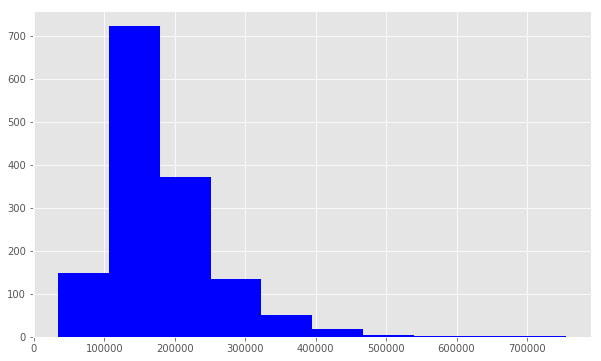

In [8]:

#Obtendo coeficiente Skew ( inclinação - VARIAVEL AINDA NAO TRANSFORMADA)
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.121335062205


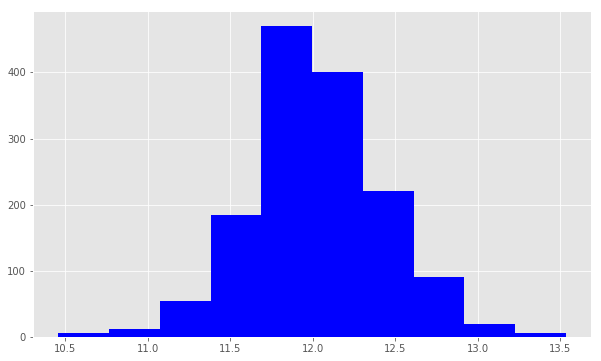

In [9]:
#Utilizando np.log para transformar, e target.skew para o calculo.
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [10]:
#Verificando o tipo das variavreis que iremos trabalhar
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:

#Obtendo a correlação dos atributos ( positivas e negativas )
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [13]:
#Obtendo os valores OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [15]:

#Criando pivot table para investigar a relação entre overallqual e salesprice.
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot


,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


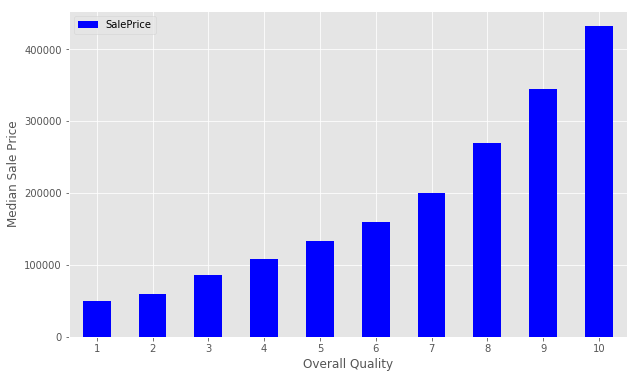

In [16]:
#Verificando a relação entre overall quality e média de preço de venda
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

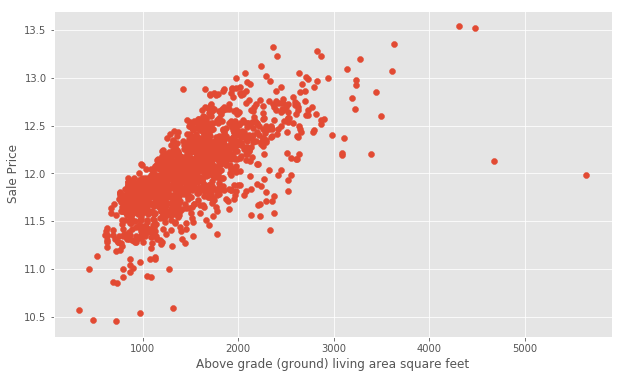

In [17]:
#Verificando o aumento de preço de acordo com a ground living area.
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

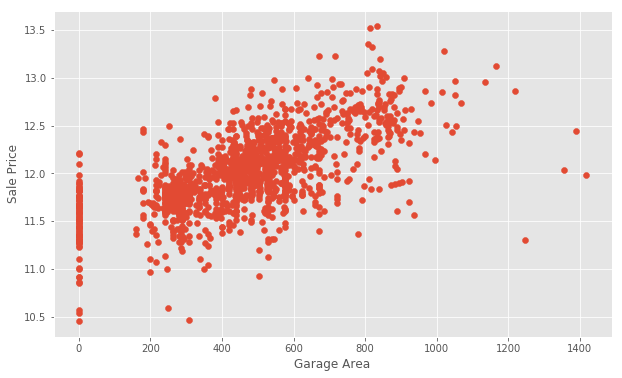

In [18]:
#Verificando o aumento de preço de acordo com a area de garagem.
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:

#Removendo outliers
train = train[train['GarageArea'] < 1200]

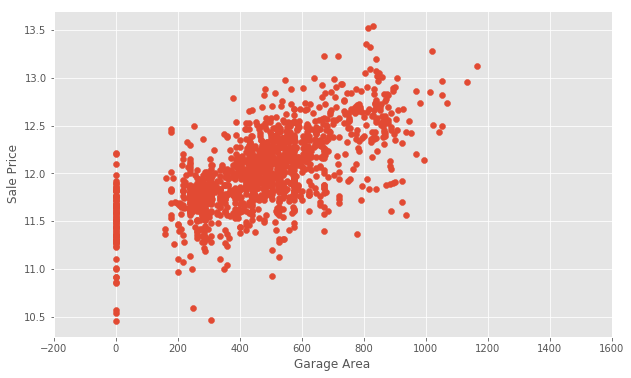

In [20]:
#refazendo correlação
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [21]:
#Manipulando valores nulos
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [22]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [23]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [24]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [27]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)


print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


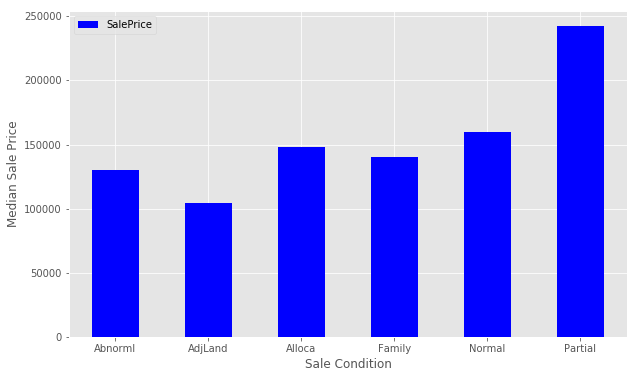

In [28]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [33]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

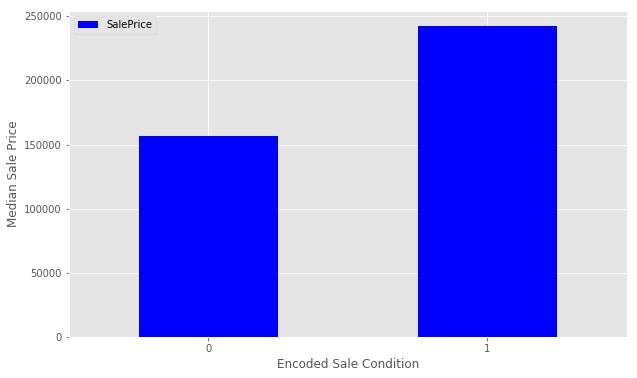

In [34]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [35]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna() 

In [36]:
sum(data.isnull().sum() != 0)

0

In [37]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0


In [38]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [40]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [41]:
model = lr.fit(X_train, y_train)

In [42]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [43]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926


In [44]:
predictions = model.predict(X_test)
print(predictions)

[ 11.91390437  12.04903047  11.77351971  11.79183754  11.26944723
  11.36259336  12.3362407   11.70692621  12.02044888  11.89282643
  11.80303488  12.52549124  12.23583076  12.66295987  11.90296635
  11.62128418  12.1919155   11.61969317  12.37146945  12.27316306
  11.33327942  12.3630367   11.44804859  11.72134009  12.19104716
  11.91161769  11.6433826   11.4860541   12.32332516  11.94553991
  11.65717913  12.12799034  11.66691198  11.56756839  11.74181221
  12.3920184   12.59215247  12.00639302  12.34095517  11.41681793
  11.72065203  12.37584697  11.83576534  11.93728211  12.64925015
  12.23261664  12.11452897  11.79781201  11.79057937  12.16953158
  11.67054344  11.43713533  12.23283768  11.70680316  12.14497386
  12.40961117  12.2527589   12.32095295  11.62612877  12.00464307
  11.30436588  11.74807775  12.56226081  12.6265578   12.33774682
  12.25758371  12.47481531  12.71448996  12.33304509  11.95177169
  11.74409611  11.87280667  12.03384939  11.51927125  11.49285229
  11.61612

In [45]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0178417945196


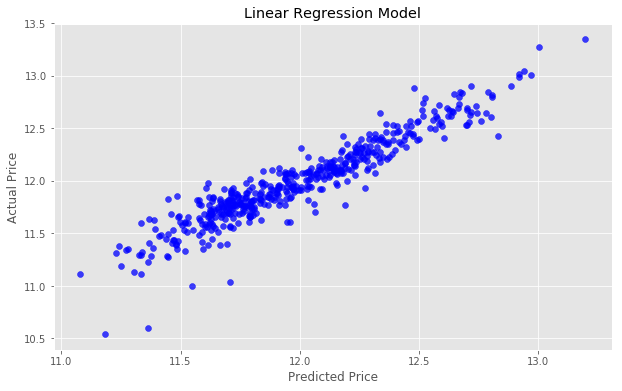

In [46]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

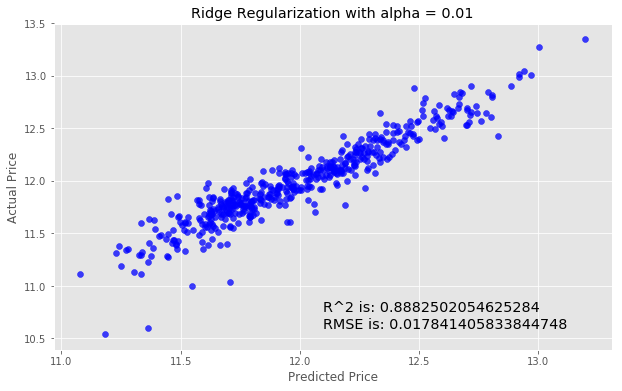

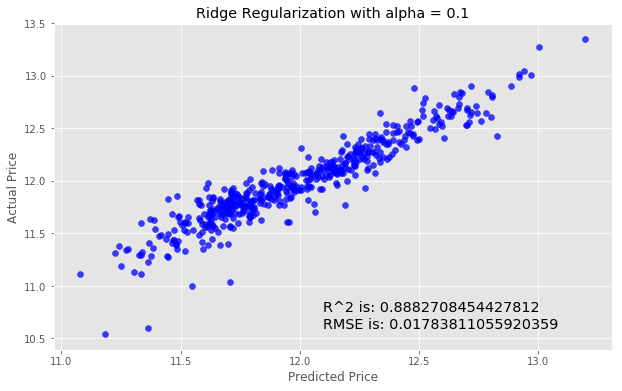

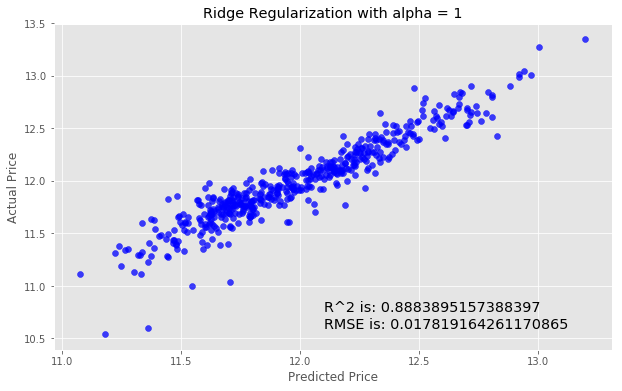

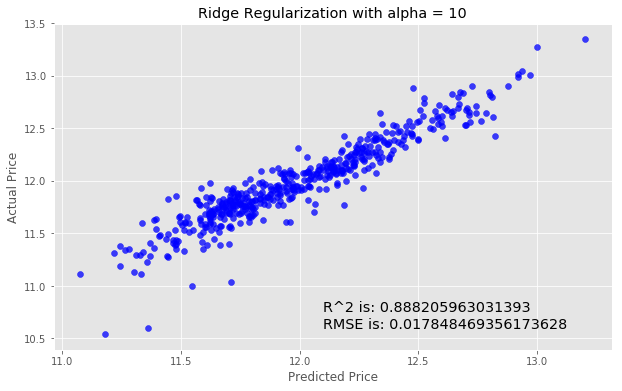

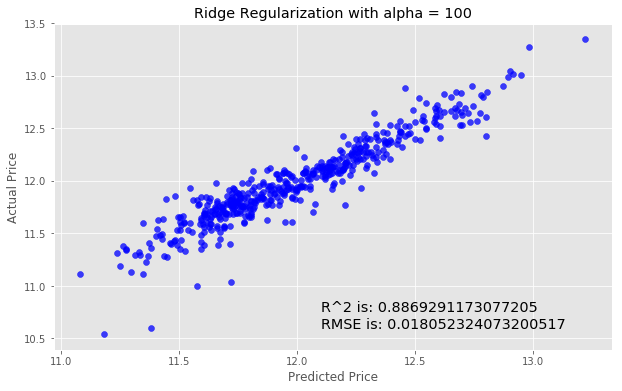

In [47]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [48]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [50]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

print(feats)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20         80.0    11622            5            6       1961   
1             20         81.0    14267            6            6       1958   
2             60         74.0    13830            5            5       1997   
3             60         78.0     9978            6            6       1998   
4            120         43.0     5005            8            5       1992   
5             60         75.0    10000            6            5       1993   
6             20         69.0     7980            6            7       1992   
7             60         63.0     8402            6            5       1998   
8             20         85.0    10176            7            5       1990   
9             20         70.0     8400            4            5       1970   
10           120         26.0     5858            7            5       1999   
11           160         21.0     1680            6 

In [51]:
predictions = model.predict(feats)
print(predictions)

[ 11.76725362  11.71929504  12.07656074 ...,  12.12505435  11.60734276
  12.39038938]


In [52]:
final_predictions = np.exp(predictions)
print(final_predictions)

[ 128959.49172586  122920.74024361  175704.82598102 ...,  184435.36303922
  109901.82646548  240479.31996393]


In [53]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [55]:
submission.to_csv('D:\\Users\\313432\\Desktop\\Police Deaths\\Getting Prices\\submission1.csv', index=False)